In [2]:
from IPython import get_ipython
get_ipython().run_line_magic("reset","-f")

from PyPackageJonas import *

figures_path = "C:/Users/jonas/Git/Analysis-of-Production-flow-systems-with-focus-on-industry/Latex Thesis/figures/"

1.0000650012500187
0.9999899993749887
0.9999900000000008
0.9999900000000008
0.9999900000000008
0.9999899993749886
1.000065001250018


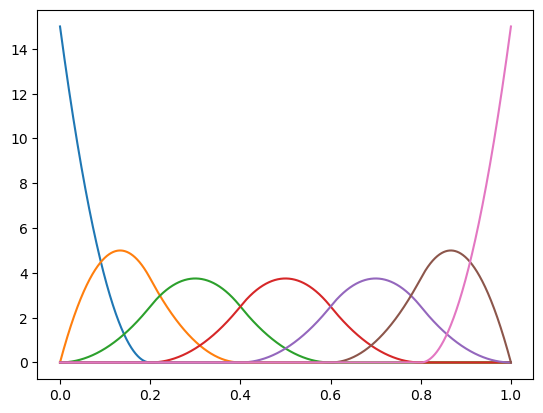

In [33]:
def z_from_x(x, M, k):
    x_min = x.min()
    x_max = x.max()
    # z = (x - x_min) * (M - k + 1)/(x_max - x_min)
    return lambda l : (l - x_min)/(x_max - x_min)

def knots(k,M):
    t = [ (i<k) * 0 + (i-k+1)*(i >= k)*(i<=M-1) + (M-1-k+2)*(i>M-1) for i in range(M+1+k)]
    return np.array(t) / (M - k + 1)

def Mx(x,k,i,t):
    if k == 1:
        if i >= M-1:
            if (t[i+1] - t[i]) > 0:
                return (1/ (t[i+1] - t[i])) * ((t[i] <= x) & ( x <= t[i+1]))
            else:
                return 0 * x
        else:
            if (t[i+1] - t[i]) > 0:
                return (1/ (t[i+1] - t[i])) * ((t[i] <= x) & ( x < t[i+1]))
            else:
                return 0 * x
    
    if t[i+k] == t[i]:
        return 0 * x
    else:
        return k /(k-1) / (t[i+k] - t[i]) * ( Mx(x,k-1,i,t) * (x-t[i]) + Mx(x,k-1,i+1,t) * (t[i+k] - x) )



n_bins = 7
M = n_bins
p = 3

t = knots(p,M)
# t = np.array([i for i in range(M)] + [M-1] * 10)

x = np.linspace(0,1,100000)
z_transformer = z_from_x(x,M,p)
# t = z_transformer(t)

# i = M-1
for i in range(0,M):
    spline = Mx(z_transformer(x),p,i,t)
    plt.plot(x, spline)
    print(spline.mean())

    
# plt.plot(x, Bx(z_transformer(x),k,-1,t))

# x = 0.999
# z = z_from_x(x,M,k)


# plt.plot(x,np.vstack([Mx(z_transformer(x),p,i,t) for i in range(-1,M)]).sum(axis = 0),"--");

# Bx(z_transformer(1),k,i,t)


In [129]:
rho = 0.4
data = scipy.stats.multivariate_normal.rvs(mean = None, cov = np.array([[1,rho],[rho,1]]), size = 100)

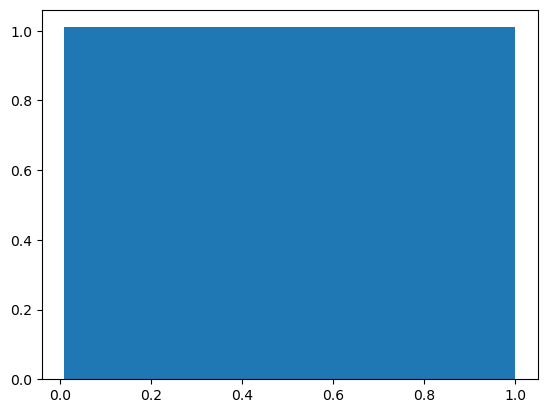

In [130]:
# xx = np.linspace(0,1,1000)
plt.hist( scipy.stats.ecdf(y).cdf.evaluate(y), bins = 100, density=True);

px
Hx : 0.04185209540741146
py
Hy : -1.6140893091895847
pxy
Hxy : -3.1491114281663477
all done
-1.5768742143841743
0.0871766935723889


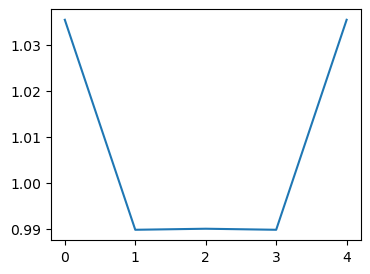

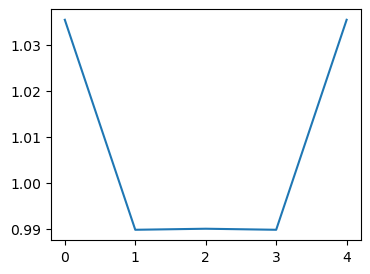

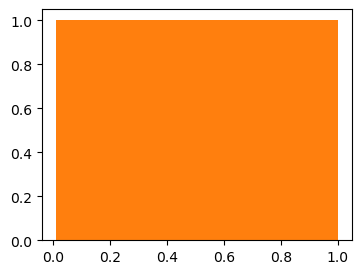

In [166]:


x = data[:,0]
# y = (0.3 * data[:,1])**3
y = data[:,1]


x = scipy.stats.ecdf(x).cdf.evaluate(x)
y = scipy.stats.ecdf(y).cdf.evaluate(y)


# x = x / x.var()**0.5
# y = y / (np.quantile(y, 0.975) - np.quantile(y, 0.025))



# idx = np.abs(y) < 0.005

# x = x[idx]
# y = y[idx]


n_bins = 5
M = n_bins
p = 3

# M serves as a regularization

t = knots(p,M)

print("px")
z_transformer_x = z_from_x(x,M,p)
px_kernel = np.vstack([Mx(z_transformer_x(x),p,i,t) for i in range(0,M)])
px = px_kernel.mean(axis = 1) / n_bins
px = px_kernel.mean(axis = 1)

px_nonnull = px[px > 0]
print(f"Hx : {(px_nonnull*np.log(px_nonnull)).sum()}")

print("py")
z_transformer_y = z_from_x(y,M,p)
py_kernel = np.vstack([Mx(z_transformer_y(y),p,i,t) for i in range(0,M)])
py = py_kernel.mean(axis = 1) / n_bins
py_nonnull = py[py > 0]
print(f"Hy : {(py_nonnull*np.log(py_nonnull)).sum()}")


print("pxy")
# pxy_kernel = py_kernel[:,None,:] * px_kernel[None,:,:]
# pxy = (pxy_kernel).mean(axis = 2)
pxy = py_kernel @ px_kernel.T / py_kernel.shape[1]  / n_bins**2
pxy_nonnull = pxy[pxy > 0]
print(f"Hxy : {(pxy_nonnull * np.log(pxy_nonnull)).sum()}")

print("all done")
# print(f"xy: {(pxy_nonnull * np.log(pxy_nonnull)).sum()}")
print( (pxy_nonnull * np.log(pxy_nonnull)).sum() - (px_nonnull*np.log(px_nonnull)).sum() - (py_nonnull * np.log(py_nonnull)).sum() )
 
# pa = np.vstack([Bx(z_transformer_x(x),p,i,t) for i in range(-1,M)]).mean(axis = 1)
# py = np.vstack([Bx(z_transformer_y(x),p,i,t) for i in range(-1,M)]).mean(axis = 1)

# idx_non_zero = pa != 0

# centers = (np.linspace(0,n_bins+1,n_bins+1) / (n_bins+1))[:-1] + 1 / (2 * (n_bins))
# plt.scatter(centers,pa)

# H = - (pa[idx_non_zero] * np.log(pa[idx_non_zero])).sum()
# print(H)


# print(0.5 * np.log(2 * np.pi * np.exp(1)))

print(-0.5 * np.log(1 - rho**2))


hist = np.histogram2d(x, y, bins = n_bins)
xx_hist, yy_hist = np.meshgrid((hist[1][1:] + hist[1][:-1])/2, (hist[2][1:] + hist[2][:-1])/2)



levels = np.linspace(0, np.max( [hist[0].max() / y.__len__(), pxy.max()] ), 20)
levels = levels.max() * (levels/levels.max())**3

dx = hist[1][1] - hist[1][0]
dy = hist[2][1] - hist[2][0]








fig, ax = plt.subplots(1,1, figsize = (4,3))
plt.plot(py_kernel.mean(axis = 1))


fig, ax = plt.subplots(1,1, figsize = (4,3))
plt.plot(px_kernel.mean(axis = 1))


fig, ax = plt.subplots(1,1, figsize = (4,3))
plt.hist(x, bins = 100)
plt.hist(y, bins = 100);
# plt.show()

# fig, ax = plt.subplots(1,1, figsize = (4,3))
# ax.hist2d(x, y, bins = n_bins);


# # plt.matshow(pxy, origin = "lower")
# fig, ax = plt.subplots(1,1, figsize = (4,3))
# ax.imshow(pxy, origin = "lower", extent=[x.min(),x.max(), y.min(), y.max()], aspect='auto')

# 8, 100
# 15, 1000
# 28, 10.000

In [114]:
pxy.sum()

1.0305555699747286

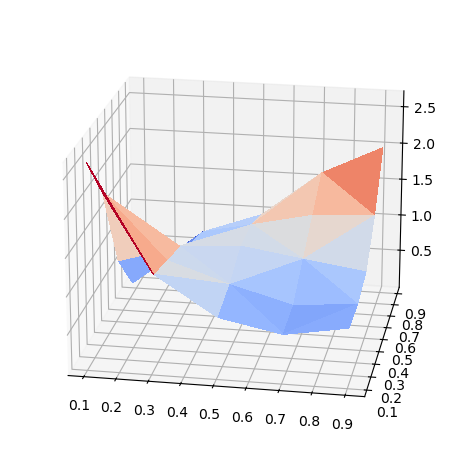

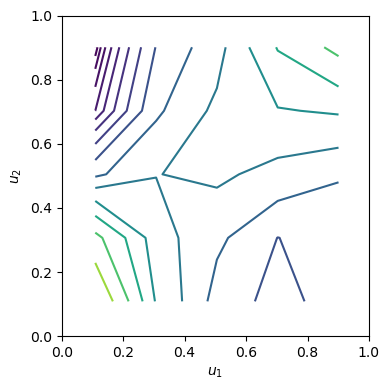

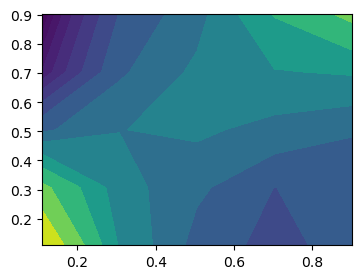

In [122]:
# B-Spline approximation

# 3d plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(xx_hist.ravel(), yy_hist.ravel(), pxy.ravel() / (dx*dy) , cmap=cm.coolwarm ,linewidth=0.2, antialiased=False)
# ax.set_zlim(0 , 35)
ax.view_init(20, -80, 0)
fig.tight_layout()


# contour plot
fig, ax = plt.subplots(1,1, figsize=(4,4))
res = ax.contour(xx_hist, yy_hist, pxy / (dx*dy),levels = levels / (dx*dy))
ax.set_xlabel("$u_1$")
ax.set_ylabel("$u_2$")
ax.set_xlim([0,1])
ax.set_ylim([0,1])
fig.tight_layout()


# contour plot 2
fig, ax = plt.subplots(1,1, figsize = (4,3))
plt.contourf(xx_hist,yy_hist, pxy, vmax = levels[-1], levels = levels)

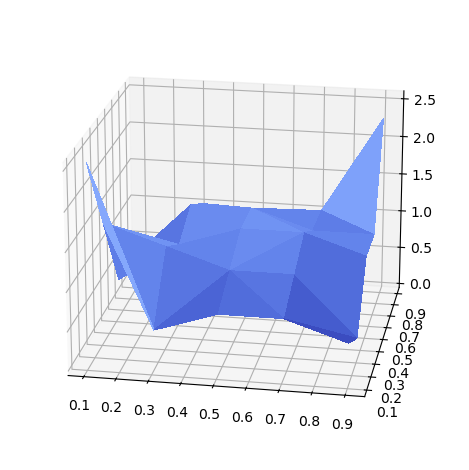

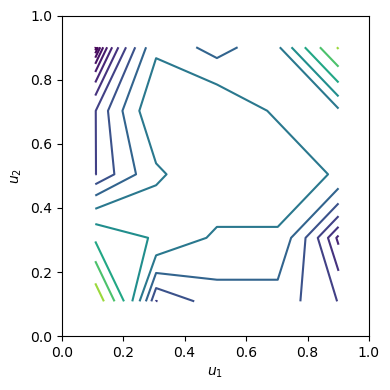

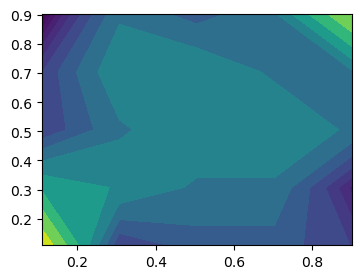

In [118]:
# emperical distribution

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(xx_hist.ravel(),yy_hist.ravel(), hist[0].T.ravel()/ y.__len__() / (dx * dy), cmap=cm.coolwarm ,linewidth=0.2, antialiased=False, vmax = 5)
# ax.set_zlim(0 , 35)
ax.view_init(20, -80, 0)
fig.tight_layout()



# contour plot
fig, ax = plt.subplots(1,1, figsize=(4,4))
res = ax.contour(xx_hist, yy_hist, hist[0].T / y.__len__() / (dx*dy),levels = levels / (dx*dy))
ax.set_xlabel("$u_1$")
ax.set_ylabel("$u_2$")
ax.set_xlim([0,1])
ax.set_ylim([0,1])
fig.tight_layout()


fig, ax = plt.subplots(1,1, figsize = (4,3))
plt.contourf(xx_hist,yy_hist, hist[0].T/ y.__len__(), vmax = levels[-1], levels = levels)


# Variance analysis

In [222]:
rho = 0.4

n_boot = 2000

print(-0.5 * np.log(1 - rho**2))


n_bins = 50
M = n_bins
p = 3

# knots are constant
t = knots(p,M)

I = np.full(n_boot, np.nan)
I_true = -0.5 * np.log(1 - rho**2)

for idx_boot in tqdm(range(n_boot)):
    data = scipy.stats.multivariate_normal.rvs(mean = None, cov = np.array([[1,rho],[rho,1]]), size = 300)






    x = data[:,0]
    y = data[:,1]


    x = scipy.stats.ecdf(x).cdf.evaluate(x)
    y = scipy.stats.ecdf(y).cdf.evaluate(y)


    # print("px")
    z_transformer_x = z_from_x(x,M,p)
    px_kernel = np.vstack([Mx(z_transformer_x(x),p,i,t) for i in range(0,M)])
    px = px_kernel.mean(axis = 1) / n_bins
    # px_kernel = np.vstack([Mx(z_transformer_x(x),p,i,t) for i in range(0,M)])
    # px_kernel = px_kernel / px_kernel.sum(axis = 0)
    # px = px_kernel.mean(axis = 1)

    # px = px / px.sum()

    px_nonnull = px[px > 0]
    Hx = (px_nonnull*np.log(px_nonnull)).sum()

    # print("py")
    z_transformer_y = z_from_x(y,M,p)
    py_kernel = np.vstack([Mx(z_transformer_y(y),p,i,t) for i in range(0,M)])
    py = py_kernel.mean(axis = 1) / n_bins

    # py = py / py.sum()

    py_nonnull = py[py > 0]
    Hy = (py_nonnull*np.log(py_nonnull)).sum()


    # print("pxy")
    pxy = py_kernel @ px_kernel.T / py_kernel.shape[1]  / n_bins**2

    # pxy = pxy / pxy.sum()

    pxy_nonnull = pxy[pxy > 0]
    Hxy = (pxy_nonnull * np.log(pxy_nonnull)).sum()


    I[idx_boot] = Hxy - Hx - Hy


print(f"var I : {I.var()}")

# rho = 0.99, bins = 50, 300 samples : 0.001187251046899866
# rho = 0.99, bins = 20, 300 samples : 0.0005754092355810123
# rho = 0.99, bins = 10, 300 samples : 8.576764000336689e-05

# rho = 0.90, bins = 50, 300 samples : 0.0011128804783249809
# rho = 0.90, bins = 20, 300 samples : 0.0015088300219506464
# rho = 0.90, bins = 10, 300 samples : 0.0008666570618020724

# rho = 0.40, bins = 50, 300 samples : 0.0007095510173454692  # very biased
# rho = 0.40, bins = 20, 300 samples : 0.0010513808947066557  # biased
# rho = 0.40, bins = 10, 300 samples : 0.001034036303072738   # least biased

0.0871766935723889


100%|██████████| 2000/2000 [00:23<00:00, 85.35it/s]

var I : 0.0006924151662888083


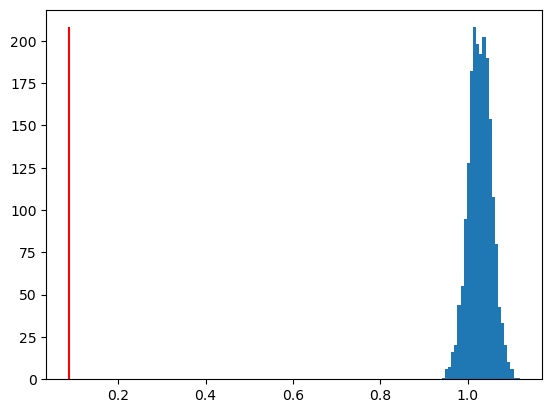

In [223]:
hist = plt.hist(I, bins = 25)
plt.vlines(I_true, 0, hist[0].max(), "r")

In [206]:
I.var()

0.0011901793981346379